In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
sample_submit_df = pd.read_csv('./data/submit.csv')

In [5]:
train_df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,88194295,1800.0,3 years,14.49,C4,NaN,debt_consolidation,665.0,Individual,FullyPaid
1,5146039,1200.0,5 years,16.29,C4,2 years,debt_consolidation,700.0,Individual,ChargedOff
2,3095896,2000.0,5 years,21.98,E4,10 years,home_improvement,670.0,Individual,FullyPaid
3,88625044,1000.0,3 years,8.59,A5,4 years,debt_consolidation,710.0,Individual,FullyPaid
4,1178189,1500.0,3 years,13.99,C1,4 years,debt_consolidation,680.0,Individual,FullyPaid


In [6]:
df = train_df.drop(columns=['id'])

In [11]:
df['loan_status'].value_counts()

FullyPaid     193815
ChargedOff     48341
Name: loan_status, dtype: int64

In [12]:
df.isnull().sum()

loan_amnt                0
term                     0
interest_rate            0
grade                    0
employment_length    13185
purpose                  0
credit_score             0
application_type         0
loan_status              0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.describe()

,loan_amnt,interest_rate,credit_score
count,228971.000000,228971.000000,228971.000000
mean,1433.415476,13.992611,697.338484
std,875.149218,4.846862,31.715229
min,100.000000,5.320000,660.000000
25%,780.000000,10.640000,675.000000
50%,1200.000000,13.490000,690.000000
75%,2000.000000,16.990000,715.000000
max,4000.000000,30.990000,845.000000


In [21]:
df.describe(include=['O'])

,term,grade,employment_length,purpose,application_type,loan_status
count,228971,228971,228971,228971,228971,228971
unique,2,35,11,13,2,2
top,3 years,B3,10 years,debt_consolidation,Individual,FullyPaid
freq,177580,16060,79095,133880,223790,184426


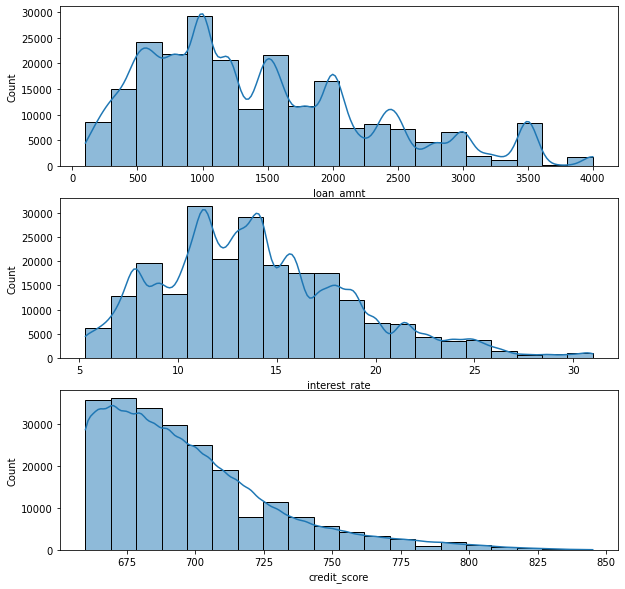

In [22]:
fig, axarr = plt.subplots(3, 1 , figsize=(10, 10)) 
sns.histplot(df.loan_amnt, bins=20, kde=True, ax=axarr[0])
sns.histplot(df.interest_rate, bins=20, kde=True, ax=axarr[1])
sns.histplot(df.credit_score, bins=20, kde=True, ax=axarr[2])
plt.show()

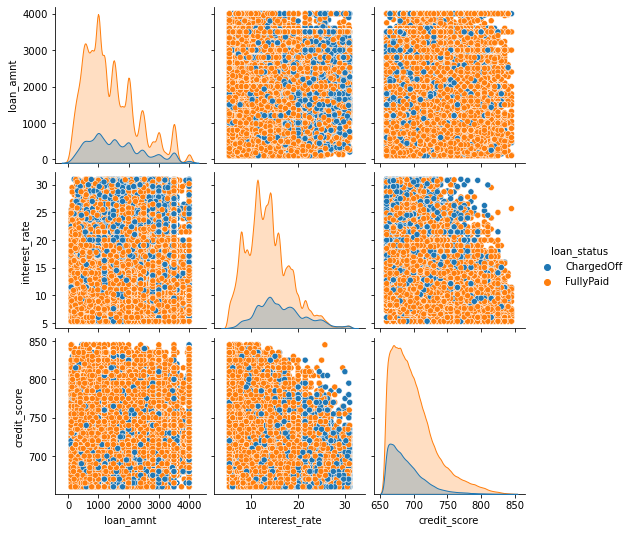

In [25]:
sns.pairplot(df[['loan_status', 'loan_amnt', 'interest_rate', 'credit_score']], hue='loan_status')
plt.show()

<AxesSubplot:>

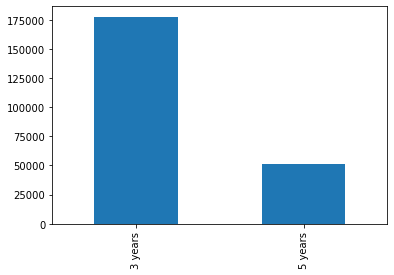

In [29]:
df['term'].value_counts().plot.bar()

<AxesSubplot:>

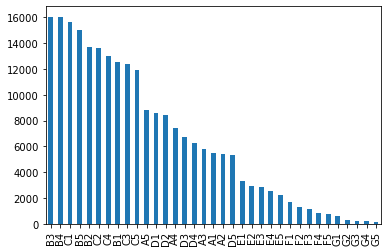

In [30]:
df['grade'].value_counts().plot.bar()

<AxesSubplot:>

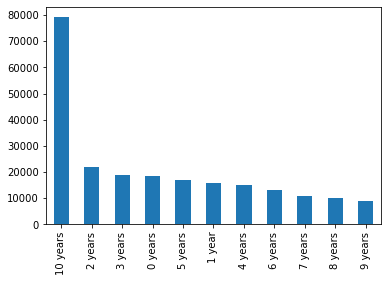

In [31]:
df['employment_length'].value_counts().plot.bar()

<AxesSubplot:>

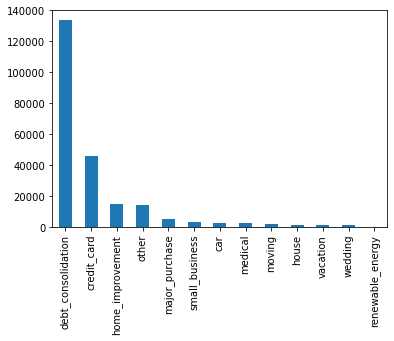

In [32]:
df['purpose'].value_counts().plot.bar()

<AxesSubplot:>

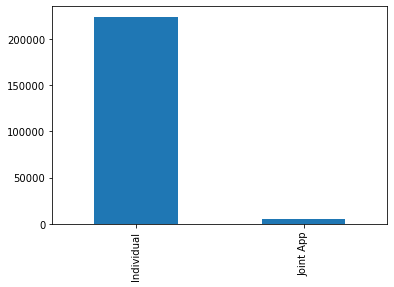

In [33]:
df['application_type'].value_counts().plot.bar()

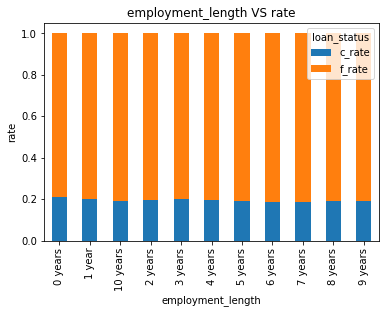

In [38]:
# ライブラリのインポート
import pandas as pd
from matplotlib import pyplot as plt

# データの読み込み・加工
loans = pd.read_csv('./data/train.csv')
loans = loans[(loans['loan_status'] == 'FullyPaid') | (loans['loan_status'] == 'ChargedOff')]
loans = loans.drop(columns=['id'])
loans = loans.dropna()

# クロス集計表の作成
cross_el = pd.crosstab(loans['employment_length'], loans['loan_status'], margins = True)
c_rate = cross_el['ChargedOff'] / cross_el['All']
f_rate = cross_el['FullyPaid'] / cross_el['All']
cross_el['c_rate'] = c_rate
cross_el['f_rate'] = f_rate
cross_el = cross_el.drop(index=['All'])

# 積み上げ棒グラフに使用したいカラムだけのDataFrameを作成
df_bar = cross_el[['c_rate', 'f_rate']]

# 積み上げ棒グラフを作成
df_bar.plot.bar(stacked=True)

# グラフタイトルの設定
plt.title('employment_length VS rate')

# x軸ラベルの設定
plt.xlabel('employment_length')

# y軸ラベルの設定
plt.ylabel('rate')

# グラフの表示
plt.show()
